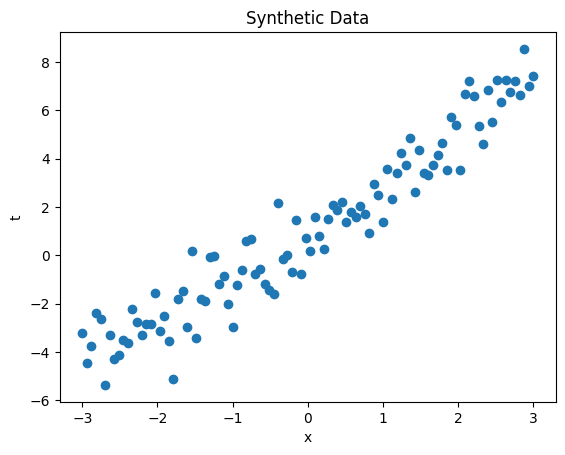

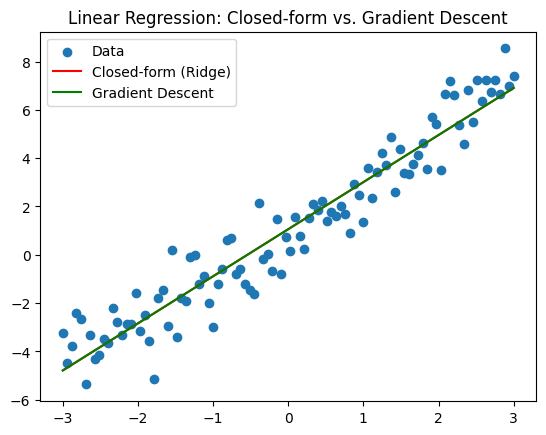

Closed-form weights: [1.94980846 1.05874927]
Gradient descent weights: [1.94980846 1.05874927]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
N = 100
x = np.linspace(-3, 3, N)
# line equation  for target comparison
t = 2 * x + 1 + np.random.normal(0, 1, N)

# Plotting
plt.scatter(x, t)
plt.xlabel("x")
plt.ylabel("t")
plt.title("Synthetic Data")
plt.show()

# Design matrix (simple linear basis)
# check phi equation  which is design matrix
#
# phi = [[1, x11,x12, ....x1D],
#        [1, x21,x22, ....x2D],
#        [1, x31,x32, ....x3D],
#        [1, xn1,x12, ....xnD],
#       ]
#
Phi = np.vstack([x, np.ones(N)]).T

# Regularization parameter
# sample value
lambda_val = 0.1

# Closed-form solution (Ridge Regression)
# np.eye(2): This creates a 2x2 identity matrix, which corresponds to 'I'. In this case, 2 is used because the design matrix Phi has 2 columns.
# Phi.T: This is the transpose of the design matrix 'Φ T '.
# Phi.T @ Phi: This performs the matrix multiplication 'Φ T Φ'.
# lambda_val * np.eye(2) + Phi.T @ Phi: This calculates 'λI+Φ T Φ'.
# w_closed_form = np.linalg.inv(lambda_val * np.eye(2) + Phi.T @ Phi) @ Phi.T @ t
# np.linalg.inv(...): This calculates the inverse of the matrix, which is '(...)^-1'.
# @: This is the matrix multiplication operator.
# t: This is the target vector 't'.

# Gradient Descent
# General Update Rule:
# 'w(τ+1)=w(τ)−η∇E n '
# This is the general gradient descent update rule.

def gradient_descent(Phi, t, lambda_val, learning_rate, num_iterations):
    w = np.zeros(Phi.shape[1])
    for _ in range(num_iterations):
        error = Phi @ w - t
        gradient = (Phi.T @ error + lambda_val * w)
        w = w - learning_rate * gradient
    return w

learning_rate = 0.001
num_iterations = 1000
w_gradient_descent = gradient_descent(Phi, t, lambda_val, learning_rate, num_iterations)

# Predictions
y_closed_form = Phi @ w_closed_form
y_gradient_descent = Phi @ w_gradient_descent

# Plotting
plt.scatter(x, t, label="Data")
plt.plot(x, y_closed_form, color="red", label="Closed-form (Ridge)")
plt.plot(x, y_gradient_descent, color="green", label="Gradient Descent")
plt.legend()
plt.title("Linear Regression: Closed-form vs. Gradient Descent")
plt.show()

# Print the weights for comparison
print("Closed-form weights:", w_closed_form)
print("Gradient descent weights:", w_gradient_descent)